<div class="row">
  <div class="col-md-11" markdown="1">
      <h1><font size="+6">Data Analyst Python Assessment</font></h1>
  </div>
  <div class="col-md-1" markdown="1">
      <img height="10px" class="center-block" src="pi_Logo_NavyReverse.png">
  </div>
</div>

This assessment is designed to evaluate your fundamental Python skills in data analysis. Please provide your solutions in the designated code cells, along with any necessary explanatory comments.

The primary objective is to assess your problem-solving approach and methodology, rather than the correctness of your code or results. Each answer will be evaluated based on its relevance to the given context.

Data set used for this code has already been provided. More information can be found in the link below:

https://open-data.bouldercolorado.gov/datasets/10c2e57f741b45428c492f67aeb98b1b_0/about

### Importing Required Libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

## Import any other libraries needed here

### Read the data set

In [98]:
ap_data = pd.read_csv('Accounts_Payable.csv')
print('Dataset has {:,} rows and {:,} columns'.format(ap_data.shape[0], ap_data.shape[1]))

ap_data.head(10)

Dataset has 381,283 rows and 11 columns


,vendor_name,transaction_date,transaction_amount,organization_code,fund,fund_desc,department,department_desc,object_code,account_description,ObjectId
0,"CGRS, INC",31/12/2023,540.00,31505010,7210,Fleet,315,Facilities & Fleet,670395,Misc Purchased Services,12401
1,FIRE AND POLICE PENSION ASSN,31/12/2023,66231.80,110000,1100,General,0,NaN,205180,FPPA Death and Disablity,12402
2,AMERIGAS PROPANE LP,31/12/2023,146.31,31505010,7210,Fleet,315,Facilities & Fleet,630320,Fleet:Propane Supply,12403
3,"OVERDRIVE, INC",31/12/2023,18550.29,50525170,2200,Library,505,Library,630420,Lib:Downloadable&eBooks,12404
4,ECO CYCLE INC,31/12/2023,271.26,61040030,6200,Wastewater Utility,610,Public Works - Utilities,670055,Solid Waste Management Fees,12405
5,ECO CYCLE INC,31/12/2023,784.02,14515070,1100,General,145,Climate Initiatives,670055,Solid Waste Management Fees,12406
6,"FRONT RANGE FIRE APPARATUS, LTD",31/12/2023,4542.16,31505010,7210,Fleet,315,Facilities & Fleet,660839,Flt R&M: Vehicle Parts,12407
7,GENERAL AIR SERVICE & SUPPLY,31/12/2023,121.56,61015010,6100,Water Utility,610,Public Works - Utilities,700405,Machine & Equip Rentals/Leases,12408
8,GENERAL AIR SERVICE & SUPPLY,31/12/2023,150.65,55520050,2500,Open Space,555,Open Space & Mountain Parks,700495,Misc Rentals & Leases,12409
9,GENERAL AIR SERVICE & SUPPLY,31/12/2023,194.12,61020010,6100,Water Utility,610,Public Works - Utilities,660996,R&M: Miscellaneous,12410


In [99]:
#### Ques 1 - Which columns in the dataset have blank cells? For those that have blank cells, what % of the total row count are blank?

In [100]:
### Hint : only columns that can logically be aggregated for relevant analysis should be numeric
## Write code here

#checking columns
ap_data.columns

Index(['vendor_name', 'transaction_date', 'transaction_amount',
       'organization_code', 'fund', 'fund_desc', 'department',
       'department_desc', 'object_code', 'account_description', 'ObjectId'],
      dtype='object')

In [101]:
#checking for null values/blank columns
ap_data.isna().sum()

vendor_name               0
transaction_date          0
transaction_amount        0
organization_code         0
fund                      0
fund_desc                 0
department                0
department_desc        8765
object_code               0
account_description       0
ObjectId                  0
dtype: int64

In [102]:
(ap_data.isna().sum() / len(ap_data)) * 100

vendor_name            0.000000
transaction_date       0.000000
transaction_amount     0.000000
organization_code      0.000000
fund                   0.000000
fund_desc              0.000000
department             0.000000
department_desc        2.298817
object_code            0.000000
account_description    0.000000
ObjectId               0.000000
dtype: float64

We can see that only the department_desc column has null value of 8765. It has approximately 2.3% of total row count blank. Since the categorical value is NA in excel and we do not know the significance of this, we will keep it as 'Unknown'.

In [103]:
#replacing missing values to Unknonw
ap_data['department_desc'].fillna('Unknown', inplace=True)

#confirming missing values again
ap_data.isna().sum()



vendor_name            0
transaction_date       0
transaction_amount     0
organization_code      0
fund                   0
fund_desc              0
department             0
department_desc        0
object_code            0
account_description    0
ObjectId               0
dtype: int64

In [104]:

#checking how many unknowns were inserted
(ap_data['department_desc'] == 'Unknown').sum()


8765

#### Ques 2 - Looking at the column headers, what data type should each be based on the context of the data? Convert the columns to the necessary data types where needed.

In [105]:
## Write code here

ap_data.dtypes

vendor_name             object
transaction_date        object
transaction_amount     float64
organization_code        int64
fund                     int64
fund_desc               object
department               int64
department_desc         object
object_code              int64
account_description     object
ObjectId                 int64
dtype: object

transaction_date to be converted to date-time datatype. 

In [106]:
# Convert transaction_date to datetime
ap_data['transaction_date'] = pd.to_datetime(ap_data['transaction_date'])

converted = ['organization_code', 'fund', 'department']
ap_data[converted] = ap_data[converted].astype(str)

ap_data.dtypes

vendor_name                    object
transaction_date       datetime64[ns]
transaction_amount            float64
organization_code              object
fund                           object
fund_desc                      object
department                     object
department_desc                object
object_code                     int64
account_description            object
ObjectId                        int64
dtype: object

In [107]:
ap_data.head(6)

,vendor_name,transaction_date,transaction_amount,organization_code,fund,fund_desc,department,department_desc,object_code,account_description,ObjectId
0,"CGRS, INC",2023-12-31,540.00,31505010,7210,Fleet,315,Facilities & Fleet,670395,Misc Purchased Services,12401
1,FIRE AND POLICE PENSION ASSN,2023-12-31,66231.80,110000,1100,General,0,Unknown,205180,FPPA Death and Disablity,12402
2,AMERIGAS PROPANE LP,2023-12-31,146.31,31505010,7210,Fleet,315,Facilities & Fleet,630320,Fleet:Propane Supply,12403
3,"OVERDRIVE, INC",2023-12-31,18550.29,50525170,2200,Library,505,Library,630420,Lib:Downloadable&eBooks,12404
4,ECO CYCLE INC,2023-12-31,271.26,61040030,6200,Wastewater Utility,610,Public Works - Utilities,670055,Solid Waste Management Fees,12405
5,ECO CYCLE INC,2023-12-31,784.02,14515070,1100,General,145,Climate Initiatives,670055,Solid Waste Management Fees,12406


#### Ques 3 - What is the date range of the data? Identify the earliest and latest date in the data

In [108]:
## Write code here

earliest_date = ap_data['transaction_date'].min()
latest_date = ap_data['transaction_date'].max()

print("Earliest date:", earliest_date.date())
print("Latest date:", latest_date.date())

Earliest date: 2014-01-05
Latest date: 2023-12-31


#### Ques 4 - List down the top 5 vendors and total spend with each in descending order of spend

In [119]:
## Write code here
top_vendors = (ap_data.groupby('vendor_name')['transaction_amount'].sum().sort_values(ascending=False).head(5).reset_index())
top_vendors.columns = ['Vendor Name', 'Total Spend']
pd.options.display.float_format = '{:,.2f}'.format
print(top_vendors)

                               Vendor Name    Total Spend
0                                  US BANK 242,598,471.49
1                                     PERA 176,175,780.90
2  CIGNA HEALTH AND LIFE INSURANCE COMPANY 133,985,683.38
3          FIDELITY NATIONAL TITLE COMPANY  93,115,863.89
4                             VANTAGEPOINT  67,209,061.55


#### Ques 5 - List down the top 5 vendors for 2023 and total spend with each in descending order of spend

In [121]:
## Write code here

#filter for 2023
top_2023 = ap_data[ap_data['transaction_date'].dt.year == 2023]

top_vendors_2023 = (top_2023.groupby('vendor_name')['transaction_amount'].sum().sort_values(ascending=False).head(5).reset_index())
top_vendors_2023.columns = ['Vendor Name', 'Total Spend']
print(top_vendors_2023)

                               Vendor Name   Total Spend
0                                     PERA 27,440,519.84
1                                  US BANK 25,036,919.19
2  CIGNA HEALTH AND LIFE INSURANCE COMPANY 20,302,334.97
3                                      IRS 17,478,294.84
4          ARCHER WESTERN CONSTRUCTION LLC 15,163,464.63


#### Ques 6 - Which 3 vendors have had the largest increase in overall spend from 2022 to 2023? What is value of the increase for each vendor?

In [111]:
#filtering 2022 and 2023
top_2223 = ap_data[ap_data['transaction_date'].dt.year.isin([2022, 2023])]

spend_2223 = top_2223.groupby([top_2223['vendor_name'], top_2223['transaction_date'].dt.year])['transaction_amount'].sum().unstack()

#renaming columns
spend_2223.columns = ['Spend 2022', 'Spend 2023']

#differencing the increase
spend_2223['Increase'] = spend_2223['Spend 2023'] - spend_2223['Spend 2022']

#sorting top 3 
top_increase_vendors = spend_2223.sort_values(by='Increase', ascending=False).head(3).reset_index()

print(top_increase_vendors)


                       vendor_name  Spend 2022   Spend 2023     Increase
0                              IRS       22.32  17478294.84  17478272.52
1     MARK YOUNG CONSTRUCTION, LLC   529920.26  14335468.54  13805548.28
2  ARCHER WESTERN CONSTRUCTION LLC  3199552.36  15163464.63  11963912.27


#### Ques 7 - Which 3 accounts have had the largest increase in overall spend from 2022 to 2023? What is value of the increase for each account?

In [112]:
## Write code here

#filtering 2022 and 2023
top_2223 = ap_data[ap_data['transaction_date'].dt.year.isin([2022, 2023])]

#grouping 
spend_2223 = top_2223.groupby([top_2223['account_description'], top_2223['transaction_date'].dt.year])['transaction_amount'].sum().unstack()

#renaming columns
spend_2223.columns = ['Spend 2022', 'Spend 2023']

#calculating the increase
spend_2223['Increase'] = spend_2223['Spend 2023'] - spend_2223['Spend 2022']

#sorting top 3
top_increase_accounts = spend_2223.sort_values(by='Increase', ascending=False).head(3).reset_index()

print(top_increase_accounts)


           account_description  Spend 2022   Spend 2023     Increase
0  Capital: Bldgs & Bldg Equip  3436811.25  22967490.04  19530678.79
1     Capital: Water Right Acq  3514679.36  15156526.25  11641846.89
2      R&M: Bldgs & Bldg Equip  3537449.30  13723133.70  10185684.40


#### Ques 8 - Draw a month-on-month trend plot for total spend for Repairs & Maintenance

Highest Monthly Spend: $4,460,041.55 in 2023-09
Lowest Monthly Spend:  $-34.57 in 2014-02


<Figure size 1000x600 with 0 Axes>

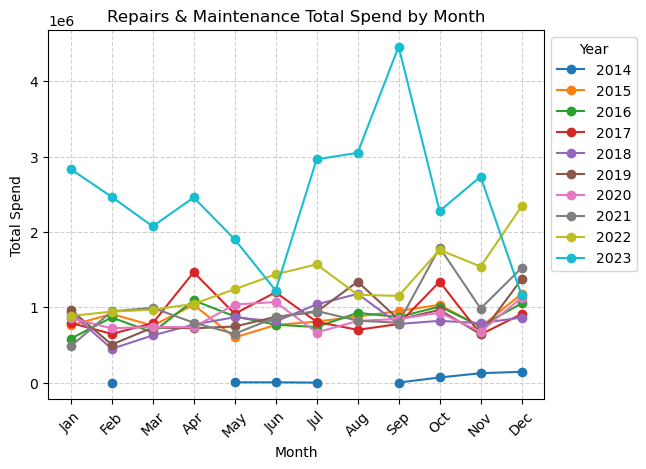

In [150]:
### Hint : Look into account descriptions to find transactions for Repairs & Maintenance
## Write code here

#filtering R&M
RM = ap_data[ap_data['account_description'].str.contains("R&M", case=False, na=False)]

#year and month 
RM['year'] = RM['transaction_date'].dt.year
RM['month'] = RM['transaction_date'].dt.month

monthly_spend = RM.groupby(['year', 'month'])['transaction_amount'].sum().reset_index()

#separate year lines 
pivot_table = monthly_spend.pivot(index='month', columns='year', values='transaction_amount')

# Find max and min spend
max_row = monthly_spend.loc[monthly_spend['transaction_amount'].idxmax()]
min_row = monthly_spend.loc[monthly_spend['transaction_amount'].idxmin()]

# Print results
print(f"Highest Monthly Spend: ${max_row['transaction_amount']:,.2f} in {int(max_row['year'])}-{int(max_row['month']):02}")
print(f"Lowest Monthly Spend:  ${min_row['transaction_amount']:,.2f} in {int(min_row['year'])}-{int(min_row['month']):02}")


#plot
plt.figure(figsize=(10, 6))
pivot_table.plot(marker='o')
plt.title("Repairs & Maintenance Total Spend by Month")
plt.xlabel("Month")
plt.ylabel("Total Spend")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year', loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.show()


Observations: 

1. The highest total spend about $4460041.55 was done in september 2023 for repairs and maintencence.
2. The lowest total spend is in negative value which indicates that during the month of feb 2014 the reairs and maintenance suffered a loss of 34 dollars.
3. After September 2023, there is decline in spending for consecutive months till the year end.
4. Overall the trend shows gradual growth in spending over the years, with occasional spikes, especially noticeable in the post 2020 period.

#### Ques 9 - We need to identify tail supplier consolidation opportunities across the accounts. Identify what is the supplier split between top 80% and tail for each account.

'Tail' refers to the long list of vendors with low spend values (look up Pareto 80-20 Analysis for more info).

You are expected split the vendors into two categories for each account:
- By descending total spend, suppliers accounting for ~80% of the total spend in the account are 'Core Suppliers'
- All remaining suppliers under that account are 'Tail Suppliers'
- Final output will be % count of suppliers in each account split into Core and Tail

This question asks you to create a data frame that will have 3 columns:
- Account Description
- % Core Suppliers
- % Tail Suppliers

In [117]:
### Hint : Look up Pareto 80-20 Analysis and how it is used for tail supplier consolidation
## Write code here


pareto_results = []

#group by account_description
for account, group in ap_data.groupby('account_description'):

#group by vendor and calculate total spend per vendor
vendor_spend = group.groupby('vendor_name')['transaction_amount'].sum().sort_values(ascending=False)

total_spend = vendor_spend.sum()
cumulative_spend = vendor_spend.cumsum()

#cutoff for 80% of spend
core_cutoff = cumulative_spend <= 0.8 * total_spend

#count suppliers
core_supplier_count = core_cutoff.sum()
total_supplier_count = len(vendor_spend)
tail_supplier_count = total_supplier_count - core_supplier_count

#calculate percentages
core_percentage = round((core_supplier_count / total_supplier_count) * 100, 2)
tail_percentage = round((tail_supplier_count / total_supplier_count) * 100, 2)

#append to results
pareto_results.append([account, core_percentage, tail_percentage])

#create final DataFrame
pareto_df = pd.DataFrame(pareto_results, columns=['Account Description', '% Core Suppliers', '% Tail Suppliers'])

pareto_df

,Account Description,% Core Suppliers,% Tail Suppliers
0,ACH (Vendor E:Pmt) Payables,0.00,100.00
1,AP Vouchers Payable,72.73,27.27
2,AR Miscellaneous,50.00,50.00
3,AR UTB Charges for Svcs,0.00,100.00
4,Accounts Payable: Other,0.00,100.00
...,...,...,...
332,Vouchers Payable: by JV,33.33,66.67
333,Water,20.00,80.00
334,Water & Ditch Assmts: Other,5.56,94.44
335,Water & Ditch Assmts:Windy Gap,0.00,100.00


**Summary**

***Data Preparation:***

1. Loaded the libraries 'pandas', 'matplotlib.pyplot', 'matplotlib.ticker' and to ignore warnings that are not important.
2. Imported and read the dataset "Account_payable" for Spend Analysis. Checked head(10) if they have successfully loaded the dataset. The dataset consists of 11 columns and 381,283 rows.
   
***Handling inconsistencies:***

1. Checked for missing values and found that department_desc has 8765 missing values which is approximately 2.3%.
2. Since department_desc is the description of the organizational unit that provides one or more services, we transformed the missing values to "Unknown".
3. Datatype for 'transaction_date' converted to date format, and 'organization_code', 'fund', and 'department' to object format.

***Analysis:***

1. The earliest date is 2014-01-05 and the latest date is 2023-12-31 of the dataset (Question 3).
2. Calculated top 5 vendors name and their total spend in descending order(Question 4).
4. Calculated top 5 vendors for 2023 and total spend with each in descending order of spend(Question 5).
5. Calculated top 5 vendors for 2023 and total spend with each in descending order of spend(Question 6).
6. Top 3 accounts that has the largest increase in overall spend from 2022 to 2023 and the increase value(Question 7) was calculated.
7. Line graph for month-on-month trend plot for total spend for Repairs & Maintenance was plotted.
8. We also found the supplier split between top 80% and tail for each account.